# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices. What if it also works now???
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [8]:
from sklearn.datasets import load_digits
import numpy as np 
# load mnist dataset and split in train and test set.
digits = load_digits()
X_train_mnist = np.reshape(digits.images[:1500],(1500,64))
X_test_mnist = np.reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]

In [2]:
#Import the necessary modules 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [203]:
#print the data such that we can visualize it
print((X_train_mnist), 
      '\n')
print((X_test_mnist),
      '\n')
print((y_train_mnist),
      '\n')
print((y_test_mnist),
      '\n')


[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   0. ...,   9.   0.   0.]
 [  0.   1.   9. ...,   9.   1.   0.]
 [  0.   5.  16. ...,   8.   6.   0.]] 

[[  0.   0.   0. ...,  13.   2.   0.]
 [  0.   0.   2. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]] 

[0 1 2 ..., 6 3 2] 

[1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4
 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 8 9 0
 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6
 4 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6
 1 7 5 4 4 7 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 

There is no need to standardize or normalize our data because of the folliwing reasons.

If we look at the data printed above we see that everything is within the range of 1 to 20, which is an small enough range.

For the K-nn algorithm, this algorithm computes the distances to its neighbours and then decides according to its k nearest neighbours what the class of the node is. The algorithm does not become faster if we make our data be in a shorter range, which will lead do smaller distances between the points. 

For logistic regression, we standardize or normalize our data, since if very big number it becomes very hard to perform matrix multiplicationwe have quadratic matrix multiplications. However, we know that we are dealing with linear logistic regression, and the range of our data set is narrow as well so therefore we do not have to standardize or normalize our data. 

In [277]:
#Train logistic regression and k-nn using default settings.
#Optimize k for k-nn,
Knn = KNeighborsClassifier()
parametersK = {'n_neighbors': np.arange(1,20)} 
clfK = GridSearchCV(Knn, parametersK)
clfK.fit(X_train_mnist, y_train_mnist)
print(clfK.best_params_)


#for logistic regression focus on the regularization parameter
LR = LogisticRegression()
parametersLR = {'C': np.arange(0.01, 10)}
clf = GridSearchCV(LR, parametersLR) 
clf.fit(X_train_mnist, y_train_mnist)
print(clf.best_params_)

{'n_neighbors': 1}
{'C': 0.01}


In [278]:
#we cross validate in these functions and determine the average accuracy and standard deviation

def av_accuracy(type, Xset, Yset):
    av_acc = np.mean(cross_val_score(type, Xset, Yset, cv=10))
    return av_acc

def standarddev(type, Xset, Yset):
    std = np.std(cross_val_score(type, Xset, Yset, cv=10))
    return std

In [287]:
#print the accuracies and standard deviation of Logistic regression and K-nn using default parameters on train set
print("The average accuracy under Logistic Regression with default parameters is:        ", 
      av_accuracy(LR, X_train_mnist, y_train_mnist))
print("The standard deviation under Logistic Regression with default parameters is:      ", 
      standarddev(LR, X_train_mnist, y_train_mnist),
     "\n")

print("The average accuracy under K-nn with default parameters is:                       ", 
      av_accuracy(Knn, X_train_mnist, y_train_mnist))
print("The standard deviation under K-nn with default parameters is:                     ", 
      standarddev(Knn, X_train_mnist, y_train_mnist),
     "\n")



#Train logistic regression using optimized parameters.
LR_opt = LogisticRegression(C=0.1)
LR_opt.fit(X_train_mnist, y_train_mnist)

#print the accuracies and standard deviation of Logistic regression and K-nn using optimized parameters on train set
print("The average accuracy under Logistic Regression with optimized parameters is:      ", 
      av_accuracy(LR_opt, X_train_mnist, y_train_mnist))
print("The standard deviation under Logistic Regression with optimized parameters is:    ", 
      standarddev(LR_opt, X_train_mnist, y_train_mnist),
     "\n")

#Train K-nn using optimized parameters
Knn_opt = KNeighborsClassifier(n_neighbors=1)
Knn_opt.fit = (X_train_mnist, y_train_mnist)

print("The average accuracy under K-nn with optimized parameters is:                     ", 
      av_accuracy(Knn_opt, X_train_mnist, y_train_mnist))
print("The standard deviation under K-nn with optimized parameters is:                   ", 
      standarddev(Knn_opt, X_train_mnist, y_train_mnist))


The average accuracy under Logistic Regression with default parameters is:         0.942841934708
The standard deviation under Logistic Regression with default parameters is:       0.0179428426554 

The average accuracy under K-nn with default parameters is:                        0.969568068457
The standard deviation under K-nn with default parameters is:                      0.021372714321 

The average accuracy under Logistic Regression with optimized parameters is:       0.952847426302
The standard deviation under Logistic Regression with optimized parameters is:     0.0176755181395 

The average accuracy under K-nn with optimized parameters is:                      0.978226258333
The standard deviation under K-nn with optimized parameters is:                    0.023415643686

 [ 0.90967742  0.96052632  0.9602649   0.94666667  0.94666667  0.94
  0.97315436  0.97315436  0.95945946  0.95890411] 

[ 0.92258065  1.          0.98675497  0.98        0.98666667  0.94666667
  0.98657718  

In [250]:
#Print the average accuracies and standard deviations using default parameters of Logistic regression and 
#K-nn on the test set
print("The average accuracy under Logistic Regression with default parameters is:        ", 
      av_accuracy(LR, X_test_mnist, y_test_mnist))
print("The standard deviation under Logistic Regression with optimized parameters is:    ", 
      standarddev(LR, X_test_mnist, y_test_mnist),
     "\n")

print("The average accuracy under K-nn with default parameters is:                       ", 
      av_accuracy(Knn, X_test_mnist, y_test_mnist))
print("The standard deviation under K-nn with default parameters is:                     ", 
      standarddev(Knn, X_test_mnist, y_test_mnist),
     "\n")

#Print the average accuracies and standard deviations using optimized parameters of Logistic regression and
#K-nn on the test set
print("The average accuracy under Logistic Regression with optimized parameters is:      ", 
      av_accuracy(LR_opt, X_test_mnist, y_test_mnist))
print("The standard deviation under Logistic Regression with optimized parameters is:    ", 
      standarddev(LR_opt, X_test_mnist, y_test_mnist),
     "\n")

print("The average accuracy under K-nn with optimized parameters is:                     ", 
      av_accuracy(Knn_opt, X_train_mnist, y_train_mnist))
print("The standard deviation under K-nn with optimized parameters is:                   ", 
      standarddev(Knn_opt, X_train_mnist, y_train_mnist))


The average accuracy under Logistic Regression with default parameters is:         0.917677388323
The standard deviation under Logistic Regression with optimized parameters is:     0.048205432794 

The average accuracy under K-nn with default parameters is:                        0.948066688389
The standard deviation under K-nn with default parameters is:                      0.0490240354803 

The average accuracy under Logistic Regression with optimized parameters is:       0.921078061723
The standard deviation under Logistic Regression with optimized parameters is:     0.0514557440459 

The average accuracy under K-nn with optimized parameters is:                      0.978226258333
The standard deviation under K-nn with optimized parameters is:                    0.023415643686
[ 0.79207921  0.91836735  0.91836735]
[ 0.83168317  0.92857143  0.95918367]


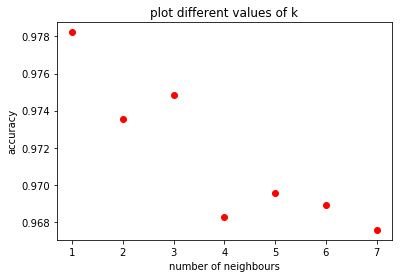

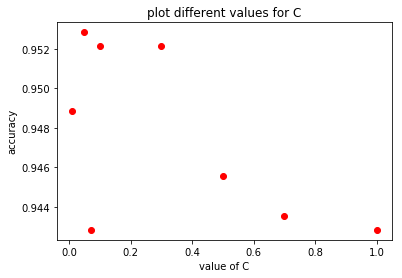

In [354]:
#Plot graph for different values of K

#In the bonus I created a function for this, but when we use the function here it takes very long
#for the function to output, therefore I create the points here "manually"
Knn2 = KNeighborsClassifier(n_neighbors=2)
Knn2.fit = (X_train_mnist, y_train_mnist)
Knn3 = KNeighborsClassifier(n_neighbors=3)
Knn3.fit = (X_train_mnist, y_train_mnist)
Knn4 = KNeighborsClassifier(n_neighbors = 4)
Knn4.fit = (X_train_mnist, y_train_mnist)
Knn5 = KNeighborsClassifier(n_neighbors = 5)
Knn5.fit = (X_train_mnist, y_train_mnist)
Knn6 = KNeighborsClassifier(n_neighbors = 6)
Knn6.fit = (X_train_mnist, y_train_mnist)
Knn7 = KNeighborsClassifier(n_neighbors = 7)
Knn7.fit = (X_train_mnist, y_train_mnist)


plt.plot([1, 2, 3, 4,5,6,7], [av_accuracy(Knn_opt,X_train_mnist, y_train_mnist), av_accuracy(Knn2, X_train_mnist, y_train_mnist), av_accuracy(Knn3, X_train_mnist, y_train_mnist), av_accuracy(Knn4, X_train_mnist, y_train_mnist), av_accuracy(Knn5, X_train_mnist, y_train_mnist), av_accuracy(Knn6, X_train_mnist, y_train_mnist), av_accuracy(Knn7, X_train_mnist, y_train_mnist)], "ro")
plt.ylabel('accuracy')
plt.xlabel('number of neighbours')
plt.title('plot different values of k')
plt.show()

#Plot graph for different values of C
LR2 = LogisticRegression(C=0.1)
LR2.fit(X_train_mnist, y_train_mnist)
LR3 = LogisticRegression(C=1)
LR3.fit(X_train_mnist, y_train_mnist)
LR4 = LogisticRegression(C=10)
LR4.fit(X_train_mnist, y_train_mnist)
LR5 = LogisticRegression(C=0.05)
LR5.fit(X_train_mnist, y_train_mnist)
LR6 = LogisticRegression(C=0.07)
LR6.fit(X_train_mnist, y_train_mnist)
LR7 = LogisticRegression(C=0.3)
LR7.fit(X_train_mnist, y_train_mnist)
LR8 = LogisticRegression(C=0.5)
LR8.fit(X_train_mnist, y_train_mnist)
LR9 = LogisticRegression(C=0.7)
LR9.fit(X_train_mnist, y_train_mnist)


plt.plot([0.01, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7, 1], [av_accuracy(LR_opt, X_train_mnist, y_train_mnist), av_accuracy(LR2, X_train_mnist, y_train_mnist), av_accuracy(LR3, X_train_mnist, y_train_mnist), av_accuracy(LR5, X_train_mnist, y_train_mnist), av_accuracy(LR6, X_train_mnist, y_train_mnist), av_accuracy(LR7, X_train_mnist, y_train_mnist), av_accuracy(LR8, X_train_mnist, y_train_mnist), av_accuracy(LR9, X_train_mnist, y_train_mnist)], 'ro')
plt.ylabel('accuracy')
plt.xlabel('value of C')
plt.title('plot different values for C')
plt.show()

In [224]:
#Give the classification report for the Logistic regression classifier
y_true_LR = y_test_mnist
y_pred_LR = LR_opt.predict(X_test_mnist)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] #since we have numbers ranging from 0 to 9 in the mnist data set. 
print("classification report of Logistic regression classifier \n", "\n", classification_report(y_true_LR, y_pred_LR, target_names=target_names))

#Give the classification report for the K-nn classifier
y_true_knn = y_test_mnist
knn_opt = KNeighborsClassifier(n_neighbors=1)
knn_opt.fit(X_test_mnist, y_test_mnist)
y_pred_knn = knn_opt.predict(X_test_mnist)
print("classification report of K-nearest-neighbour classifier \n", "\n", classification_report(y_true_knn, y_pred_knn, target_names=target_names))


classification report of Logistic regression classifier 
 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      1.00      0.98        31
          2       1.00      1.00      1.00        27
          3       1.00      1.00      1.00        30
          4       1.00      1.00      1.00        33
          5       1.00      1.00      1.00        30
          6       1.00      1.00      1.00        30
          7       1.00      1.00      1.00        30
          8       1.00      0.96      0.98        28
          9       1.00      1.00      1.00        31

avg / total       1.00      1.00      1.00       297

classification report of K-nearest-neighbour classifier 
 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       1.00      1.00      1.00        31
          2       1.00      1.00      1.00        27
          3       1.00      

explenation of the classifcation report

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples

The f1-score can be interpreted as a weighted harmonic mean of the precision and recall, where an f1-score reaches its best value at 1 and worst score at 0.
The f1-score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important

The support is the number of occurrences of each class in y_true.

In [232]:
#Give the confusion matrix for the logistic regression classifier
print("Confusing matrix of Logistic Regression classifier \n")
print(confusion_matrix(y_true_LR, y_pred_LR))

#Give the confusion matrix for the logistic regression classifier
print("\n\n Confusion matrix of K-nearest-neighbour classifier \n")
print(confusion_matrix(y_true_knn, y_pred_knn))

Confusing matrix of Logistic Regression classifier 

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 31]]


 Confusion matrix of K-nearest-neighbour classifier 

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  0 31]]


In the confusion matrix, the rows represent the actual numbers going from 0 to 9 and the columns represent the numbers classified by the classifier going from 0 to 9. 

## Results and analysis of the experiment

We see that over all in this experiment, K-nn works slightly better than Logistic Regression. When we look at the accuracies with optimized parameters, we see that the accuracy of K-nn is 0.978226258333 with optimized parameters whearas that of Logistic Regression is 0.952847426302 with optimized parameters. 

When we plot the accuracies of K-nn classifier for different values of k, we see that the accuracy is the highest for 1 neighbour. We also see that the accuracy for 3 neighbours is slightly higher than the accuracy for 2 neighbours, but a lot lower than the accuracy for 1 neighbour. For 4 and 5 neighbours the accuracy is even lower. What stands the accuracies for the odd number of neighbous is almost always higher than the accuracy for the even number before that number. We see that the accuracy for n=3 is higher than n=2 and the accuracy for n=5 for n = 4. This is only not the case for n = 7. This at first seems contradicting, but we know that we can always determine to which class a point belongs if we take an odd number for k, whereas if we take an even number for k, we have to perform additional operations to make sure that we can always identify this point. It could be the case that these additional operations affect the accuracy in a negative way, and therefore an odd number for k has a higher accuracy. 

When we plot the accuracies for different values of C for logistic regression, we see that for almost all instances, the accuracy becomes lower for higher values of C. This is only not the case for C = 0.07, for that point the accuracy is suddenly a lot lower. 

If we look at the classification report of K-nn, we notice the following things. 
We see that the precision, recall and f1-score are 1 for every instance of K-nn. 

The fact that the precision is 1 means that tp / (tp + fp) is equal to 1. This means that tp needs to be equal to (tp + fp) which means that fp = 0. So we see that in the K-nn classifier, there are no false positives. 

The fact that the recall is 1 means that the ratio tp / (tp + fn) is 1. This also means that tp needs to be equal to (tp + fn), which means that fn = 0. Therefore, we see that in the K-nn classifier, we do not have false negatives.

By combining this information we see that we have no false positives and no false negatives, which means that we do not have any wrongly classified instances. 

Since the f1-score is the weighted harmonic mean of the precision and recall and the precision and recall both are 1, it makes sense that the f1-score is 1 as well. 

In the classification report of Logistic Regression, we see that the average precision, recall and f1-score are respectively 0.90, 0.89, 0.89. As we have shown above, the fact that the precision is 0.90, means that 10% of what the logisic classifier classifies as positive, are actually false positives.

The fact that the recall ratio is 89 means that only 89% of all our actual positive instances is classified as an positive instance by our classifier, thus 11% of our true positives are classified as negatives by the Logistic Regression classifier. 

Since the f1-score is the weighted harmonic mean of the precision and recall and the precision and recall are 0.90 and 0.89 respectivily, it makes sense that the f1-score is 0.89.

If we look at the precision and recall scores for our digits for the logistic regression classifier individually, we notice that the recall ratio of the 3 is relatively low, namely 0.63. This thus means that we have a lot of actual 3's which are not classified as 3's by the classifier. Moreover, we see that the precision ratio of 8 is relatively low, namely 0.68. This means that we classify a lot of numbers as 8's which are actually not 8's. As 3 and 8 look similar, it could be the case that many 3's are being classified as 8's by our logistic regression classifier. 


Finally, we consider the confusion matrix of the both classifiers. First we notice that all the correctly classified instances appear on the diagonal of the matrix and all the instances that are wrongly classified not on the diagonal. 

If we look at the confusion matrix of the K-nn classifier, we notice that the only non-zero digits are on the diagonal. This again tells us that there are no false positives nor false negatives. 

If we look at the confusion matrix of the Logistic Regression classifier, we notice that here there are also non-zero digits not on the diagonal. This means that we indeed have wrongly classified instances.

From our classification report, we suspected that there are relatively many 3's that are classified as 8's. If we look at position (9,4), we can see exactly how many 3's are being classified as 0's. We see that this number is 5, which is the biggest number not being on the diagonal, and we also notice that this is relatively big since we only have 30 actual instances of 3's. 

Moreover, we can read of the confusion matrix that 
- one 0 is being classified as a 4
- three 1's are being classified as an 8
- one 3 is being classified as a 1
- two 3's are being classified as a 7
- three 6's are being classified as a 9
- one 5 is being classified as a 1
- one 7 is being classified as a 1
- two 7's are being classified as an 8
- two 8's are being classified as a 1
- two 9's are being classified as a 1
- one 9 is being classified as a 3
- one 9 is being classified as a 7
- two 9's are being classified as an 8

so if we sum up all these wrongly classified instances we get: 22

BONUS: only continue with this part if you are confident that your implemention is complete
- tune more parameters of logistic regression
- add additional classifiers (NN, Naive Bayes, decision tree),
- analyse additional dataset (ex. Iris dataset)

# Bonus, Tune more parameters

In [304]:
#here we search for the optimal values of two additional parameters, namely intercept_scaling and max_iter
parametersLR_IS = {'intercept_scaling': np.arange(0.01, 10)}
clf = GridSearchCV(LR, parametersLR_IS) 
clf.fit(X_train_mnist, y_train_mnist)
print(clf.best_params_)

parametersLR_MI = {'max_iter': np.arange(1, 100)}
clf = GridSearchCV(LR, parametersLR_MI) 
clf.fit(X_train_mnist, y_train_mnist)
print(clf.best_params_)

{'intercept_scaling': 7.0099999999999998}
{'max_iter': 7}


In [350]:
#Train the new optimum for logistic regression with the additional optimal parameters
LR_opt = LogisticRegression(C=0.1, intercept_scaling= 7.009999, max_iter=7)
LR_opt.fit(X_train_mnist, y_train_mnist)


print("The average accuracy under Logistic Regression with additional optimized parameters is:                   ", 
      av_accuracy(LR_opt, X_train_mnist, y_train_mnist))
print("The standard deviation under Logistic Regression with additional optimized parameters is:                 ", 
      standarddev(LR_opt, X_train_mnist, y_train_mnist),
     "\n")

print("The average accuracy under Logistic Regression with additional optimized parameters on the test set is:   ", 
      av_accuracy(LR_opt, X_test_mnist, y_test_mnist))
print("The standard deviation under Logistic Regression with additional optimized parameters on the test set is: ", 
      standarddev(LR_opt, X_test_mnist, y_test_mnist),
     "\n")

The average accuracy under Logistic Regression with additional optimized parameters is:                    0.948869622252
The standard deviation under Logistic Regression with additional optimized parameters is:                  0.0199466831998 

The average accuracy under Logistic Regression with additional optimized parameters on the test set is:    0.924129001226
The standard deviation under Logistic Regression with additional optimized parameters on the test set is:  0.0454692980345 



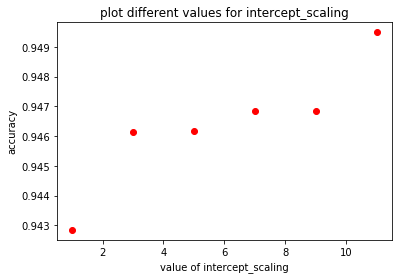

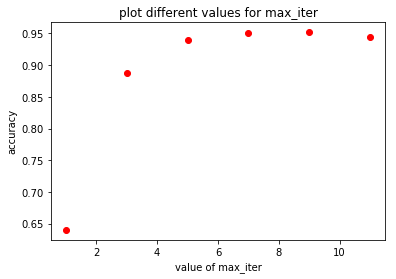

In [349]:
#plot a graph for multiple values of intercept_scaling
def gpLRIC(X):
    LRIC = LogisticRegression(intercept_scaling= X)
    LRIC.fit(X_train_mnist, y_train_mnist)
    return LRIC

plt.plot([1, 3, 5, 7, 9, 11], [av_accuracy(gpLRIC(1),X_train_mnist, y_train_mnist), av_accuracy(gpLRIC(3), X_train_mnist, y_train_mnist), av_accuracy(gpLRIC(5), X_train_mnist, y_train_mnist), av_accuracy(gpLRIC(7), X_train_mnist, y_train_mnist), av_accuracy(gpLRIC(9), X_train_mnist, y_train_mnist), av_accuracy(gpLRIC(11), X_train_mnist, y_train_mnist)], "ro")
plt.ylabel('accuracy')
plt.xlabel('value of intercept_scaling')
plt.title('plot different values for intercept_scaling')
plt.show()

#plot a graph for multiple values of max_iter
def gpLRMI(X):
    LRMI = LogisticRegression(max_iter=X)
    LRMI.fit(X_train_mnist, y_train_mnist)
    return LRMI

plt.plot([1, 3, 5, 7, 9, 11], [av_accuracy(gpLRMI(1),X_train_mnist, y_train_mnist), av_accuracy(gpLRMI(3), X_train_mnist, y_train_mnist), av_accuracy(gpLRMI(5), X_train_mnist, y_train_mnist), av_accuracy(gpLRMI(7), X_train_mnist, y_train_mnist), av_accuracy(gpLRMI(9), X_train_mnist, y_train_mnist), av_accuracy(gpLRMI(11), X_train_mnist, y_train_mnist)], "ro")
plt.ylabel('accuracy')
plt.xlabel('value of max_iter')
plt.title('plot different values for max_iter')
plt.show()

# Bonus, analysis extra parameters

We thus see that the accuracy gets higher as the value of intercept_scaling gets higher. Moreover, we see that for low values of max_iter is the accuracy is low. Then it reaches a peak at 7 iterations and then it goes down very slowly

# Bonus, Additional Classifier Decision Tree

In [351]:
from sklearn import tree
clfDT = tree.DecisionTreeClassifier()
clfDT.fit(X_train_mnist, y_train_mnist)

#search for the best value of max_depth
parametersDT_MD = {'max_depth': np.arange(1, 10)}
clf = GridSearchCV(clfDT, parametersDT_MD) 
clf.fit(X_train_mnist, y_train_mnist)
print(clf.best_params_)

#search for the best value of min_samples_split
parametersDT_MSS = {'min_samples_split': np.arange(2, 10)}
clf = GridSearchCV(clfDT, parametersDT_MSS) 
clf.fit(X_train_mnist, y_train_mnist)
print(clf.best_params_)



{'max_depth': 9}
{'min_samples_split': 5}


In [343]:
#Train the decision tree classifier on the found optimal values for the parameters on the trian set
clfDT_opt = tree.DecisionTreeClassifier(max_depth=9, min_samples_split=2)
clfDT_opt.fit(X_train_mnist, y_train_mnist)

#print the accuracies and standard deviation using 10-fold-crossvalidation on the training and test set
print("The average accuracy under Logistic Regression with additional optimized parameters is:                   ", 
      av_accuracy(clfDT_opt, X_train_mnist, y_train_mnist))
print("The standard deviation under Logistic Regression with additional optimized parameters is:                 ", 
      standarddev(clfDT_opt, X_train_mnist, y_train_mnist),
     "\n")

print("The average accuracy under Logistic Regression with additional optimized parameters on the test set is:   ", 
      av_accuracy(clfDT_opt, X_test_mnist, y_test_mnist))
print("The standard deviation under Logistic Regression with additional optimized parameters on the test set is: ", 
      standarddev(clfDT_opt, X_test_mnist, y_test_mnist),
     "\n")

The average accuracy under Logistic Regression with additional optimized parameters is:                    0.82309722829
The standard deviation under Logistic Regression with additional optimized parameters is:                  0.0477538623817 

The average accuracy under Logistic Regression with additional optimized parameters on the test set is:    0.760887290726
The standard deviation under Logistic Regression with additional optimized parameters on the test set is:  0.065761804585 



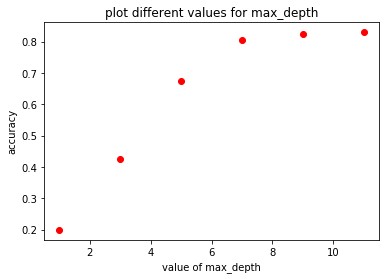

In [334]:
#plot a graph for multiple values for the parameter max_depth
def gpDT(X):
    DT = tree.DecisionTreeClassifier(max_depth=X)
    DT.fit(X_train_mnist, y_train_mnist)
    return DT

plt.plot([1, 3, 5, 7, 9, 11], [av_accuracy(gpDT(1),X_train_mnist, y_train_mnist), av_accuracy(gpDT(3), X_train_mnist, y_train_mnist), av_accuracy(gpDT(5), X_train_mnist, y_train_mnist), av_accuracy(gpDT(7), X_train_mnist, y_train_mnist), av_accuracy(gpDT(9), X_train_mnist, y_train_mnist), av_accuracy(gpDT(11), X_train_mnist, y_train_mnist)], "ro")
plt.ylabel('accuracy')
plt.xlabel('value of max_depth')
plt.title('plot different values for max_depth')
plt.show()

In [319]:
#Give a classification report 
y_true_DT = y_test_mnist
y_pred_DT = clfDT_opt.predict(X_test_mnist)
print(classification_report(y_true_DT, y_pred_DT, target_names=target_names))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95        27
          1       0.67      0.65      0.66        31
          2       0.80      0.74      0.77        27
          3       0.59      0.43      0.50        30
          4       0.79      0.91      0.85        33
          5       0.93      0.87      0.90        30
          6       0.93      0.83      0.88        30
          7       0.72      0.87      0.79        30
          8       0.55      0.64      0.59        28
          9       0.73      0.71      0.72        31

avg / total       0.76      0.76      0.76       297



In [320]:
#give the confusion matrix
print(confusion_matrix(y_true_DT, y_pred_DT))

[[26  0  0  0  0  0  0  1  0  0]
 [ 0 20  3  1  1  0  0  0  5  1]
 [ 1  1 20  2  0  0  1  2  0  0]
 [ 0  2  1 13  1  2  0  2  7  2]
 [ 0  0  0  0 30  0  0  2  0  1]
 [ 0  0  0  1  1 26  1  0  0  1]
 [ 0  1  0  0  2  0 25  0  2  0]
 [ 0  0  0  2  1  0  0 26  0  1]
 [ 1  4  1  1  0  0  0  1 18  2]
 [ 0  2  0  2  2  0  0  2  1 22]]


# Analysis Decision Tree Classifier

We have tuned the parameter max_depth. We see that the accuracy gets higher as the max_depth gets higher. 

We see that the accuracies of the Decision tree classifier are lower than the accuracies of K-nn classifier or Logistic regression, namely .83 on the training set and 0.76 on the test set

We see in the classification report that the recall and prediction value are never 1, meaning that for every class we misclassify instances. 

In the confusion matrix we see that expecially a lot (7) of 3's are being classified as 8's. Moreover, five 1's are being classified as 8's and four 8's are being classified as 1's. 

We thus see again that a lot of 3's are being classified as 8's, which we also had for the Logistic Regression classifier, but the decision tree classifier also mixes up the 1's and the 8's. 

# Bonus, Neural Networks classifier

In [295]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier()
NN = NN.fit(X_train_mnist, y_train_mnist) #train the MPLclassifier on the test set

0.954871887964


In [ ]:
#we find the optimal values for the parameters of the Neural Network classifier
parametersNNA = {'activation' : ('identity', 'logistic', 'tanh', 'relu')}
clfNNA = GridSearchCV(NN, parametersNNA)
clfNNA.fit(X_train_mnist, y_train_mnist)
print(clfNNA.best_params_)

parametersNN_MI = {'max_iter': np.arange(100,300)}
clfNN_MI = GridSearchCV(NN, parametersNN_MI)
clfNN_MI.fit(X_train_mnist, y_train_mnist)
print(clfNN_MI.best_params_)


In [352]:
print("The average accuracy under Neural Networks with default parameters is:                        ", 
      av_accuracy(NN, X_train_mnist, y_train_mnist))
print("The standard deviation under Neural Networks with default parameters is:                      ", 
      standarddev(NN, X_train_mnist, y_train_mnist),
     "\n")

#Train Neural Networks using optimized parameters on the test set.
NN_opt = MLPClassifier(activation = 'logistic', max_iter=1000)
NN_opt.fit(X_train_mnist, y_train_mnist)

 
print("The average accuracy under Neural Networks with optimized parameters is:                      ", 
      av_accuracy(NN_opt, X_test_mnist, y_test_mnist))
print("The standard deviation under Neural Networks with optimized parameters is:                    ", 
      standarddev(NN_opt, X_test_mnist, y_test_mnist),
     "\n")


#now print the scores on your test set
print("The average accuracy under Neural Networks with default parameters is on the test set:        ", 
      av_accuracy(NN, X_test_mnist, y_test_mnist))
print("The standard deviation under Neural Networks with default parameters is on the test set:      ", 
      standarddev(NN, X_test_mnist, y_test_mnist),
     "\n")
print("The average accuracy under Neural Networks with optimized parameters is on the test set:      ", 
      av_accuracy(NN_opt, X_test_mnist, y_test_mnist))
print("The standard deviation under Neural Networks with optimized parameters is on the test set:    ", 
      standarddev(NN_opt, X_test_mnist, y_test_mnist),
     "\n")


The average accuracy under Neural Networks with default parameters is:                         0.954285948319
The standard deviation under Neural Networks with default parameters is:                       0.028035363294 

The average accuracy under Neural Networks with optimized parameters is:                       0.937027029124
The standard deviation under Neural Networks with optimized parameters is:                     0.041848027682 

The average accuracy under Neural Networks with default parameters is on the test set:         0.916786528883
The standard deviation under Neural Networks with default parameters is on the test set:       0.0469678269017 

The average accuracy under Neural Networks with optimized parameters is on the test set:       0.946485903583
The standard deviation under Neural Networks with optimized parameters is on the test set:     0.0305657374555 



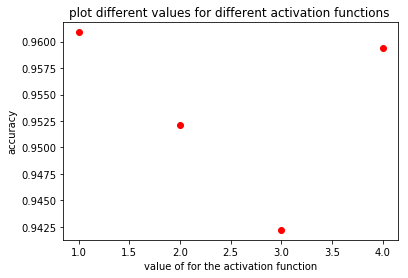

In [335]:
#plot graph for different "values" of the activation function
def gpNN(X):
    NN = MLPClassifier(activation=X)
    NN.fit(X_train_mnist, y_train_mnist)
    return NN

plt.plot([1, 2, 3, 4], [av_accuracy(gpNN('logistic'),X_train_mnist, y_train_mnist), av_accuracy(gpNN('relu'), X_train_mnist, y_train_mnist), av_accuracy(gpNN('identity'), X_train_mnist, y_train_mnist), av_accuracy(gpNN('tanh'), X_train_mnist, y_train_mnist)], "ro")
plt.ylabel('accuracy')
plt.xlabel('value of for the activation function') #here 1 represents "logistic", 2 "relu", 3 "identity" and 4 "tahn
plt.title('plot different values for different activation functions ')
plt.show()   



In [143]:
#Give a classification report 
y_true_NN = y_test_mnist
y_pred_NN = NN.predict(X_test_mnist)
print(classification_report(y_true_NN, y_pred_NN, target_names=target_names))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96        27
          1       0.91      0.97      0.94        31
          2       0.96      1.00      0.98        27
          3       1.00      0.67      0.80        30
          4       0.88      0.91      0.90        33
          5       0.83      1.00      0.91        30
          6       0.97      0.97      0.97        30
          7       0.90      0.93      0.92        30
          8       0.74      0.89      0.81        28
          9       1.00      0.84      0.91        31

avg / total       0.92      0.91      0.91       297



In [145]:
#give the confusion matrix
print(confusion_matrix(y_true_NN, y_pred_NN))

[[25  0  0  0  1  0  1  0  0  0]
 [ 0 30  0  0  1  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  1 20  0  3  0  2  4  0]
 [ 0  1  0  0 30  0  0  0  2  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  1  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  1  0  0 28  1  0]
 [ 0  1  0  0  1  1  0  0 25  0]
 [ 0  0  0  0  0  2  0  1  2 26]]


# Analysis Neural Networks classifier

We see that the accuracies of the Neural Network Classifier are high, and aproximately equally as high as those of the K-nn classifier and Logistic Regression classifier. 

In our plot we see that the "logistic" activation function results in a high accuracy and the "identity" activation function in a lower accuracy. However, that accuracy is still 0.94 which is high as well. 

When we look at the classification report, we see that all the precision and recall scores are reasonably high, except for the recall score of class 3 and the precision score of 8, they are much lower.

In the confusion matrix we see again that four 3's are being misclassified as 8's, just like in the logisitc regression classifier and the decision tree classifier. 

# Bonus, Naive Bayes classifier

In [341]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_mnist, y_train_mnist) #train the GaussianNB classifier using default settings on the training set

#print the accuracies and standard deviation using default settings on the train and test set
print("The average accuracy under Naive Bayes with default parameters is:                                   ", 
      av_accuracy(gnb, X_train_mnist, y_train_mnist))
print("The standard deviation under Naive Bayes with default parameters is:                                 ", 
      standarddev(gnb, X_train_mnist, y_train_mnist),
     "\n")

print("The average accuracy under Naive Bayes with default parameters on test set is:                       ", 
      av_accuracy(gnb, X_test_mnist, y_test_mnist))
print("The standard deviation under Naive Bayes with default parameters on test set is:                     ", 
      standarddev(gnb, X_test_mnist, y_test_mnist),
     "\n")


The average accuracy under Naive Bayes with default parameters is:                                    0.843732737128
The standard deviation under Naive Bayes with default parameters is:                                  0.0536649233545 

The average accuracy under Naive Bayes with default parameters on test set is:                        0.832724402241
The standard deviation under Naive Bayes with default parameters on test set is:                      0.0481905318579 



The Gaussian Naive Bayes classifier does not have any other parameters than the prior parameter, which we cannot tune. Therefore we cannot perform this stap op the Gaussian Naive Bayes classifier. 

In [137]:
#Give the classification report 
y_true_gnb = y_test_mnist
y_pred_gnb = gnb.predict(X_test_mnist)
print(classification_report(y_true_gnb, y_pred_gnb, target_names=target_names))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        27
          1       0.69      0.87      0.77        31
          2       0.95      0.70      0.81        27
          3       1.00      0.47      0.64        30
          4       0.96      0.82      0.89        33
          5       0.78      0.93      0.85        30
          6       0.97      0.97      0.97        30
          7       0.59      0.87      0.70        30
          8       0.56      0.71      0.63        28
          9       0.91      0.68      0.78        31

avg / total       0.84      0.80      0.80       297



In [146]:
#Give the confusion matrix
print(confusion_matrix(y_true_gnb, y_pred_gnb))

[[26  0  0  0  1  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  4  0]
 [ 0  4 19  0  0  0  1  0  1  2]
 [ 0  1  0 14  0  4  0  3  8  0]
 [ 0  0  0  0 27  0  0  5  1  0]
 [ 0  1  0  0  0 28  0  1  0  0]
 [ 0  1  0  0  0  0 29  0  0  0]
 [ 0  0  1  0  0  1  0 26  2  0]
 [ 0  4  0  0  0  1  0  3 20  0]
 [ 1  1  0  0  0  2  0  6  0 21]]


# Analysis Naive Bayes classifier

we see that the accuracies of the Naive Bayes classifier are lower than K-nn, Logistic Regression and Neural networks, but higher than the of the decision tree classifier. 

Again, this classifier misclassifies many (8) 3's as 8's as we can see in the confusion matrix. Moreover, this classifier also misclassifies six 9's as 7's

In [329]:
#Bonus try iris dataset.
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

X = iris.data[:, :3] 
Y = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, Y, test_size=0.5)

KnnI = KNeighborsClassifier()
parametersK = {'n_neighbors': np.arange(1,10)}
clfK = GridSearchCV(Knn, parametersK)
clfK.fit(X_train_iris, y_train_iris)
print(clfK.best_params_)

LRI = LogisticRegression()
parametersL = {'C': np.arange(0.001, 10)}
clf = GridSearchCV(LR, parametersL) 
clf.fit(X_train_iris, y_test_iris)
print(clf.best_params_)

{'n_neighbors': 7}
{'C': 0.001}


In [331]:
print("The average accuracy under Logistic Regression with default parameters on the iris dataset is:         ", 
      av_accuracy(LRI, X_train_iris, y_train_iris))
print("The standard deviation under Logistic Regression with optimized parameters on the irisdata set is:     ", 
      standarddev(LR, X_train_iris, y_train_iris),
     "\n")

print("The average accuracy under K-nn with default parameters on the iris dataset is:                        ", 
      av_accuracy(KnnI, X_train_iris, y_train_iris))
print("The standard deviation under K-nn with default parameters is:                                          ", 
      standarddev(Knn, X_train_iris, y_train_iris),
     "\n")



#Train logistic regression and k-nn using optimized parameters.
LR_optI = LogisticRegression(C=10)
LR_optI.fit(X, Y)


print("The average accuracy under Logistic Regression with optimized parameters on the iris dataset is:       ", 
      av_accuracy(LR_optI, X_train_iris, y_train_iris))
print("The standard deviation under Logistic Regression with optimized parameters on the iris dataset is:     ", 
      standarddev(LR_optI, X_train_iris, y_train_iris),
     "\n")

Knn_optI = KNeighborsClassifier(n_neighbors=7)
Knn_optI.fit = (X_train_iris, y_train_iris)

print("The average accuracy under K-nn with optimized parameters on the iris dataset is:                      ", 
      av_accuracy(Knn_optI, X, Y))
print("The standard deviation under K-nn with optimized parameters on the iris dataset is:                    ", 
      standarddev(Knn_opt, X, Y))


The average accuracy under Logistic Regression with default parameters on the iris dataset is:          0.895833333333
The standard deviation under Logistic Regression with optimized parameters on the irisdata set is:      0.0773923984209 

The average accuracy under K-nn with default parameters on the iris dataset is:                         0.920833333333
The standard deviation under K-nn with default parameters is:                                           0.0863013132384 

The average accuracy under Logistic Regression with optimized parameters on the iris dataset is:        0.908333333333
The standard deviation under Logistic Regression with optimized parameters on the iris dataset is:      0.0829156197589 

The average accuracy under K-nn with optimized parameters on the iris dataset is:                       0.946666666667
The standard deviation under K-nn with optimized parameters on the iris dataset is:                     0.0516397779494


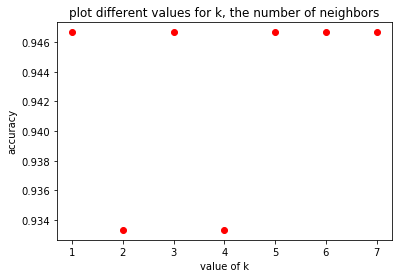

In [336]:
plt.plot([1, 2, 3, 4,5,6,7], [av_accuracy(Knn_optI, X, Y), av_accuracy(Knn2, X, Y), av_accuracy(Knn3, X, Y), av_accuracy(Knn4, X, Y), av_accuracy(Knn5, X, Y), av_accuracy(Knn6, X, Y), av_accuracy(Knn7, X, Y)], "ro")
plt.ylabel('accuracy')
plt.xlabel('value of k')
plt.title('plot different values for k, the number of neighbors')
plt.show()

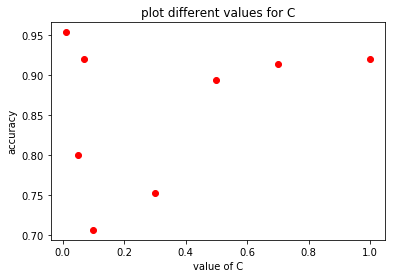

In [337]:



plt.plot([0.01, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7, 1], [av_accuracy(LR_optI, X, Y), av_accuracy(LR2, X, Y), av_accuracy(LR3, X, Y), av_accuracy(LR5, X, Y), av_accuracy(LR6, X, Y), av_accuracy(LR7, X, Y), av_accuracy(LR8, X, Y), av_accuracy(LR9, X, Y)], 'ro')
plt.ylabel('accuracy')
plt.xlabel('value of C')
plt.title('plot different values for C')
plt.show()

In [104]:
target_namesI = ['0', '1', '2']
y_true_knnI = y_test_iris
knn_optI = KNeighborsClassifier(n_neighbors=2)
knn_optI.fit(X_test_iris, y_test_iris)
y_pred_knnI = knn_optI.predict(X_test_iris)

In [105]:
print(classification_report(y_true_knnI, y_pred_knnI, target_names=target_namesI))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.92      1.00      0.96        24
          2       1.00      0.92      0.96        24

avg / total       0.98      0.97      0.97        75



In [106]:
print(confusion_matrix(y_true_knnI, y_pred_knnI))

[[27  0  0]
 [ 0 24  0]
 [ 0  2 22]]


In [110]:
y_true_LRI = y_test_iris
y_pred_LRI = LR_optI.predict(X_test_iris) 
print(classification_report(y_true_LR, y_pred_LR, target_names=target_namesI))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.91      0.83      0.87        24
          2       0.85      0.92      0.88        24

avg / total       0.92      0.92      0.92        75



In [332]:
print(confusion_matrix(y_true_LRI, y_pred_LRI))

[[27  0  0]
 [ 0 20  4]
 [ 0  2 22]]


Analysis Iris dataset

If we look at the plotted values for different values of k for K-nn classifier, we see that generally the accuracy is higher if we have a higher k. However, the accuracy of k=1, k=2, k=4 is almost equal, and the accuracy of k=3, k=5, k=6, k=7 is also almost equally as high. It thus seems as if there is some sort of treashold that we need to pass, and then the accuracy "jumps" up. Here we see as well that the accuracy of k=3 (which is an odd number) is higher than the accuracy for k=4(which is an even number). This supports the claim that the accuracy of the K-nn classifier is slightly higher for odd numbers than for even numbers if the numbers are close to eachother. 

When we look at the classification report of the K-nn classifier, we see that for class 0, every instance is being classified correcly, since the prediction, recall and f1-score are all 1.
For class 1 we see that the recall score is 0.92, which means that some instances are being classified as class 1 by the K-nn classifier while they actually do not belong to class 1. We see that the recall score for class 1, which means that everything that belongs to class 1, is also classified as belonging to class 1. 

Since the f1 score is the harmonic average of the recall and precision score, it makes sense that this is 96

For class 3 we see that the precision score is 1, which means that everything that is classified as class 3, belongs also actually to class 3. However, we see that the recall score is 0.92, which means that 8% of the instances that belong to class 3 are not classified as belonging to class 3. 

After this we suspect that some instances of class 3 are being classified as instances of class 2.

When we look at the confusion matrix, we see indeed that 2 instances that belong to class 3 are being classied as belonging to class 2


If we look at the plotted values for different values of c for the Logistic Regression classifier, we see that the accuracy very high for very small values of c, then it reaches a minimum, and then for higher values of C, the accuracy goes up again. We see that the minimum is when C=0.07, just as for the mnist data set.

if we look at the classification report of the Logistic classifier, we see that again that for class 0, every instance is being classified correctly, since the prediction, recall and f1-score are all 1.
For class 1 we see that the prediction and recall are 0.91 and 0.83 respectifely. We thus see that 9% of the instances that is being classified as class 1 actually does not belong to class 1, and 17% of the items that belong to class 1 are being classified as not belonging to class 1

For class 2 we see that the prediction and recall are 0.85 and 0.92 respectively. Therefore 15% of the instances that are being classified as belonging to class 2 actually do not belong to class 2, and 8% of the instances that belong to class 2 are classified as not belonging to class 2. 

Therefore we assume that items from class 1 are being classified as class 2 and the other way around.

If we look at the confusion matrix, we indeed see that 4 items that are actually class 2 are being classified as class 3, and 2 items that are class 3 are being classified as class 2. 

We see that for both the K-nn classifier and the Logistic classifier that the accuracies are lower 


# TOTAL ANALYSIS

In the end, we see that the K-nn classifier classifies our data the best 